# Creating Playlists in Spotify


---
## 1.&nbsp; Import libraries and files 💾

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://drive.google.com/file/d/1RHDTom4VbFFoequXQq7WEL9WVLKduZuu/view?usp=sharing"

path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# Create a Pandas DataFrame from the CSV data
fivethnSongs_df = pd.read_csv(path)

---
## 2.&nbsp; Cleaning data and selecting features

In [ ]:
fivethnSongs_df.sample(20)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
2355,2355,"Snap Your Fingers, Snap Your Neck ...",Prong,0.668,0.7880,5,-6.752,1,0.0424,0.000075,0.108000,0.0792,0.6920,137.380,,251533,4,7hgtn706RqLE5q1mWe8aQx,https://open.spotify.com/track/7hgtn706RqLE5q1...
1613,1613,Superstar ...,Jamelia,0.801,0.6450,1,-6.930,1,0.0356,0.045700,0.000000,0.0357,0.8240,110.010,,215480,4,3oobWqIgYrSRg18uqRuPIF,https://open.spotify.com/track/3oobWqIgYrSRg18...
839,839,Not Fade Away ...,Buddy Holly & The Crickets,0.799,0.4750,9,-13.142,1,0.0413,0.835000,0.000000,0.2750,0.9200,95.966,,142773,4,6sBPjgvLZzHHrpxbBDjmdE,https://open.spotify.com/track/6sBPjgvLZzHHrpx...
3556,3556,Destroying Divinity ...,Monstrosity,0.248,0.9810,8,-9.135,1,0.2320,0.000647,0.806000,0.1830,0.0706,99.204,,206760,4,3KXfwNcNe9H4HHrlivQmQ3,https://open.spotify.com/track/3KXfwNcNe9H4HHr...
4809,4809,Pflaster ...,Ich + Ich,0.648,0.8730,1,-4.656,1,0.0347,0.153000,0.000024,0.5310,0.3970,143.958,,204293,4,0gIQb6fbCPllnyeJcSUHqa,https://open.spotify.com/track/0gIQb6fbCPllnye...
4287,4287,Scapegoat ...,Fear Factory,0.236,0.9140,7,-10.414,1,0.0566,0.000068,0.735000,0.3350,0.3850,95.574,,273200,4,76ieKjJ6nagh6kG0f11V1R,https://open.spotify.com/track/76ieKjJ6nagh6kG...
2593,2593,Blue in Green (feat. John Coltrane & Bill Evan...,Miles Davis,0.421,0.0162,2,-25.358,0,0.0388,0.808000,0.002400,0.0978,0.1540,110.479,,337733,4,0aWMVrwxPNYkKmFthzmpRi,https://open.spotify.com/track/0aWMVrwxPNYkKmF...
3982,3982,Enshrined By Grace ...,Morbid Angel,0.291,0.9940,6,-6.924,1,0.1200,0.179000,0.210000,0.2210,0.0481,108.772,,267827,4,0kZpf1IEP2dKOOi1cQxRBj,https://open.spotify.com/track/0kZpf1IEP2dKOOi...
5010,5010,Relación ...,Sech,0.805,0.5620,7,-3.117,0,0.1050,0.125000,0.000005,0.1480,0.7670,172.094,,184255,4,3ZG8N7aWw2meb6UrI5ZmnZ,https://open.spotify.com/track/3ZG8N7aWw2meb6U...
1860,1860,Bless the Broken Road ...,The Piano Guys,0.466,0.1150,0,-19.856,1,0.0536,0.988000,0.911000,0.1830,0.3550,113.021,,235451,4,2kR0npzjabSWl3eGy0cSk0,https://open.spotify.com/track/2kR0npzjabSWl3e...


In [ ]:
fivethnSongs_df.columns

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [ ]:
# to delete the spaces in the names of the columns
fivethnSongs_df.columns = fivethnSongs_df.columns.str.strip()
fivethnSongs_df['name'] = fivethnSongs_df['name'].str.strip()
fivethnSongs_df['artist'] = fivethnSongs_df['artist'].str.strip()

In [ ]:
fivethnSongs_df.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [ ]:
fivethnSongs_df.duplicated().sum()

np.int64(0)

In [ ]:
fivethnSongs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5235 non-null   int64  
 1   name              5235 non-null   object 
 2   artist            5235 non-null   object 
 3   danceability      5235 non-null   float64
 4   energy            5235 non-null   float64
 5   key               5235 non-null   int64  
 6   loudness          5235 non-null   float64
 7   mode              5235 non-null   int64  
 8   speechiness       5235 non-null   float64
 9   acousticness      5235 non-null   float64
 10  instrumentalness  5235 non-null   float64
 11  liveness          5235 non-null   float64
 12  valence           5235 non-null   float64
 13  tempo             5235 non-null   float64
 14  type              5235 non-null   object 
 15  duration_ms       5235 non-null   int64  
 16  time_signature    5235 non-null   int64  


Next: Drop the columns that we are not going to use and change the index to be the 'id'

In [ ]:
fivethnSongs_df['Unnamed: 0'].nunique()

5235

In [ ]:
fivethnSongs_df['id'].nunique()

5171

In [ ]:
fivethnSongs_df['html'].nunique()

5171

In [ ]:
fivethnSongs_df.duplicated(subset = 'html').value_counts()

,count
False,5171
True,64


In [ ]:
dupli = fivethnSongs_df.duplicated(subset = [ 'id'], keep = False) # keep False, to display every duplicated row
fivethnSongs_df.loc[dupli,:].sort_values(by= 'name')

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
85,85,Berekerê - Voice,Geraldo Azevedo,0.434,0.573,4,-11.203,0,0.0666,0.8300,0.0,0.0584,0.786,172.189,,316600,4,4tJ1bFWFJ6teL8hTObeXC4,https://open.spotify.com/track/4tJ1bFWFJ6teL8h...
144,144,Berekerê - Voice,Geraldo Azevedo,0.434,0.573,4,-11.203,0,0.0666,0.8300,0.0,0.0584,0.786,172.189,,316600,4,4tJ1bFWFJ6teL8hTObeXC4,https://open.spotify.com/track/4tJ1bFWFJ6teL8h...
494,494,Bette Davis Eyes,Kim Carnes,0.675,0.649,5,-10.271,1,0.0319,0.0204,0.0,0.0959,0.596,116.624,,228000,4,0odIT9B9BvOCnXfS0e4lB5,https://open.spotify.com/track/0odIT9B9BvOCnXf...
1306,1306,Bette Davis Eyes,Kim Carnes,0.675,0.649,5,-10.271,1,0.0319,0.0204,0.0,0.0959,0.596,116.624,,228000,4,0odIT9B9BvOCnXfS0e4lB5,https://open.spotify.com/track/0odIT9B9BvOCnXf...
769,769,Black Magic,Little Mix,0.775,0.885,4,-5.023,1,0.0610,0.0330,0.0,0.3120,0.820,111.997,,212720,4,7FtLZygO3k5bz49x02dQO7,https://open.spotify.com/track/7FtLZygO3k5bz49...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,760,Wannabe,Spice Girls,0.768,0.864,11,-6.145,1,0.0324,0.1010,0.0,0.1620,0.891,110.008,,173027,4,1Je1IMUlBXcx1Fz0WE7oPT,https://open.spotify.com/track/1Je1IMUlBXcx1Fz...
2300,2300,Yeah!,Usher,0.895,0.795,2,-4.693,1,0.0977,0.0219,0.0,0.0403,0.574,105.004,,250067,4,2PkeVPcL32LA96cK5ySC3c,https://open.spotify.com/track/2PkeVPcL32LA96c...
1535,1535,Yeah!,Usher,0.895,0.795,2,-4.693,1,0.0977,0.0219,0.0,0.0403,0.574,105.004,,250067,4,2PkeVPcL32LA96cK5ySC3c,https://open.spotify.com/track/2PkeVPcL32LA96c...
1198,1198,You Can Get It If You Really Want,Jimmy Cliff,0.894,0.559,1,-8.547,1,0.0568,0.2480,0.0,0.0762,0.929,128.164,,158893,4,2QKh6t4JnWeTnzQpkNXhzW,https://open.spotify.com/track/2QKh6t4JnWeTnzQ...


In [ ]:
fivethnSongs_df.drop_duplicates(subset = 'html', inplace = True)
fivethnSongs_df.duplicated(subset = 'html').value_counts()

,count
False,5171


In [ ]:
fivethnSongs_df.duplicated(subset = 'id').value_counts()

,count
False,5171


Now, we have deleted the most evident duplicates. We are now going to select the features to do the lists

In [ ]:
Spotify5000i = fivethnSongs_df.drop(['key','mode','liveness','time_signature','duration_ms', 'html','artist','name','Unnamed: 0', 'type'], axis=1).copy()

In [ ]:
Spotify5000i.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'tempo', 'id'],
      dtype='object')

In [ ]:
Spotify5000i.duplicated().sum()

np.int64(0)

Now, we want to keep the 'html' information, as well as the songs' names and artists to later on create the actual lists.

In [ ]:
Spotify5000i_links = fivethnSongs_df.loc[:,['name','artist','html','id']].copy()

In [ ]:
Spotify5000i_links.head(3)

,name,artist,html,id
0,Se Eu Quiser Falar Com Deus,Gilberto Gil,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,1n7JnwviZ7zf0LR1tcGFq7
1,Saudade De Bahia,Antônio Carlos Jobim,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,5QGM1U0eCYrQuwSJwTm5Zq
2,"Canta Canta, Minha Gente",Martinho Da Vila,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,0NLIFSZxPzQhCwnkn5PJYs


In [ ]:
Spotify5000i_links.set_index('id', inplace=True)

In [ ]:
Spotify5000i = Spotify5000i.set_index('id')

In [ ]:
Spotify5000i.tail(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
id,,,,,,,,
2XNwnFrdMDpismp0VUZ7cU,0.0596,0.00093,-42.959,0.0434,0.951,0.969,0.0344,71.573
7ucDwgMtE3YJtEfTbuRhy0,0.1330,0.02080,-29.443,0.0419,0.883,0.505,0.0591,67.109
7E1ErYYCn0lYjHODZ1qGuB,0.3540,0.04870,-24.568,0.0323,0.783,0.484,0.2530,64.120


In [ ]:
Spotify5000i.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,5171.000000,5171.000000,5171.00000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.507604,0.653282,-9.37628,0.083165,0.291275,0.260326,0.442248,118.667082
std,0.218101,0.289464,6.31599,0.071136,0.356862,0.371854,0.277927,28.587880
min,0.000000,0.000000,-60.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306000,0.475500,-11.38200,0.038900,0.002320,0.000001,0.195000,96.083500
50%,0.536000,0.738000,-7.35800,0.055600,0.095900,0.002210,0.415000,119.058000
75%,0.686500,0.895000,-5.29550,0.098800,0.570000,0.656000,0.676000,134.039500
max,0.967000,1.000000,1.34200,0.918000,0.996000,0.985000,0.985000,213.990000


---
## 3.&nbsp; Scaling and Clustering
Now, we should scale before clustering


In [ ]:
#import pandas as pd # already imported
from sklearn.metrics import pairwise_distances
#import matplotlib.pyplot as plt # already imported
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [ ]:
#Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas")
Spotify5000 = scaler.fit_transform(Spotify5000i)

In [ ]:
Spotify5000.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.524926,0.653282,0.825270,0.090593,0.292444,0.264291,0.448983,0.554545
std,0.225544,0.289464,0.102964,0.077490,0.358295,0.377517,0.282160,0.133594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316443,0.475500,0.792573,0.042375,0.002329,0.000001,0.197970,0.449009
50%,0.554292,0.738000,0.858172,0.060566,0.096285,0.002244,0.421320,0.556372
75%,0.709928,0.895000,0.891795,0.107625,0.572289,0.665990,0.686294,0.626382
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Spotify5000

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
id,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.310660,0.515800
5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.703553,0.584322
0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.918782,0.437862
3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.531980,0.499098
7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.408122,0.565171
...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.066497,0.410795
1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.036041,0.388495
2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.034924,0.334469


### Now, we make the clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
random_seed = 27

my_full_kmeans = KMeans(n_clusters = 31,
                      random_state = random_seed  #
                      )
my_full_kmeans.__dict__

{'n_clusters': 31,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': 27,
 'copy_x': True,
 'algorithm': 'lloyd'}

In [ ]:
Spotify5000_k31 = Spotify5000.copy()
my_full_kmeans.fit(Spotify5000_k31)

KMeans(n_clusters=31, random_state=27)

In [ ]:
mlist_k31 = my_full_kmeans.labels_
Spotify5000_k31['play_list'] = mlist_k31
Spotify5000_k31 = Spotify5000_k31.sort_values(by='play_list')

In [ ]:
Spotify5000_k31

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,play_list
id,,,,,,,,,
3FmAUR4SPWa3P1KyDf21Fu,0.639090,0.748,0.832953,0.393246,0.038554,0.000004,0.672081,0.626202,0
17zF4zfyb78Cku56d11gkF,0.477766,0.847,0.866454,0.564270,0.029016,0.000000,0.670051,0.860246,0
4IYKjN1DrYzxKXt0umJqsG,0.620476,0.706,0.849353,0.393246,0.209839,0.000000,0.588832,0.812776,0
4Kz4RdRCceaA9VgTqBhBfa,0.792141,0.442,0.838610,0.387800,0.000107,0.000062,0.395939,0.943035,0
4Li2WHPkuyCdtmokzW2007,0.815926,0.858,0.887777,0.338780,0.127510,0.000000,0.786802,0.654339,0
...,...,...,...,...,...,...,...,...,...
52aLJ0vt7gC2Ck8YF1pTsl,0.437435,0.578,0.863242,0.063181,0.004157,0.001228,0.452792,0.621562,30
4BIeUmSnhzsbc9Gx9siazj,0.373320,0.638,0.851423,0.042810,0.395582,0.013706,0.313706,0.576821,30
5huh0htdiJDatAtbHLtpfz,0.475698,0.182,0.738303,0.033007,0.284137,0.000026,0.190863,0.673237,30


Now we do it for a different number

In [ ]:
random_seed = 27

my_full_kmeans = KMeans(n_clusters = 100, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed  # controlling random_state makes the outcome reproducible
                      )

Spotify5000_k100 = Spotify5000.copy()
my_full_kmeans.fit(Spotify5000_k100)

mlist_k100 = my_full_kmeans.labels_
Spotify5000_k100['play_list'] = mlist_k100
Spotify5000_k100 = Spotify5000_k100.sort_values(by='play_list')

Spotify5000_k100['play_list']

,play_list
id,
2eOuL8KesslTLQERQPu11D,0
792TEXXCBN8SxkQOsWCECr,0
1IRNjfivqiDhzey02C11ge,0
2i1rj1tPT3oIsGp1KAGjZu,0
12pH5ZrPApPNNnicTWvUiV,0
...,...
2yK4879j9Q1XnJio6ETqJV,99
6Cr4GuonfqCCFIqSSOGTBG,99
4xgBVNYwDQNhtpeyxQWP8s,99


With this dataset does not make much sense to look at the changes with different seed.

In [ ]:
Spotify5000_k100['play_list'].value_counts()

,count
play_list,
77,123
25,107
22,100
18,94
11,94
...,...
12,13
93,13
52,13


In [ ]:
#Spotify5000_k100.loc[Spotify5000_k100["play_list"]==75, ['play_list','instrumentalness']]

,play_list,instrumentalness
id,,
4461iENdKgtUYpveYwIarD,75,0.0


In [ ]:
random_seed = 27

my_full_kmeans = KMeans(n_clusters = 55, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed  # controlling random_state makes the outcome reproducible
                      )

Spotify5000_k55 = Spotify5000.copy()
my_full_kmeans.fit(Spotify5000_k55)

mlist_k55 = my_full_kmeans.labels_
Spotify5000_k55['play_list'] = mlist_k55
Spotify5000_k55 = Spotify5000_k55.sort_values(by='play_list')

Spotify5000_k55['play_list'].value_counts()

,count
play_list,
11,181
36,176
22,174
13,172
50,159
18,158
43,148
23,143
38,141


Now, I will use other two features and see what we get

I will write the code in a function

In [ ]:
def Spotilist5000(m):
  random_seed = 27
  NumClus = m
  my_full_kmeans = KMeans(n_clusters = NumClus, # we'll explore how to choose the number of clusters in a later notebook
                          random_state = random_seed  # controlling random_state makes the outcome reproducible
                         )

  Spotify5000_aux = Spotify5000.copy()
  my_full_kmeans.fit(Spotify5000_aux)

  mlist_aux = my_full_kmeans.labels_
  Spotify5000_aux['play_list'] = mlist_aux
  Spotify5000_aux = Spotify5000_aux.sort_values(by='play_list')

  return Spotify5000_aux

In [ ]:
Spotify5000_k23 = Spotilist5000(23)

### Number of clusters

The next step is to estimate the number of clusters

In [ ]:
# Decide on a random_state to use
seed = 27

# Set the maximum number of clusters to try
max_k = 60

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(Spotify5000)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

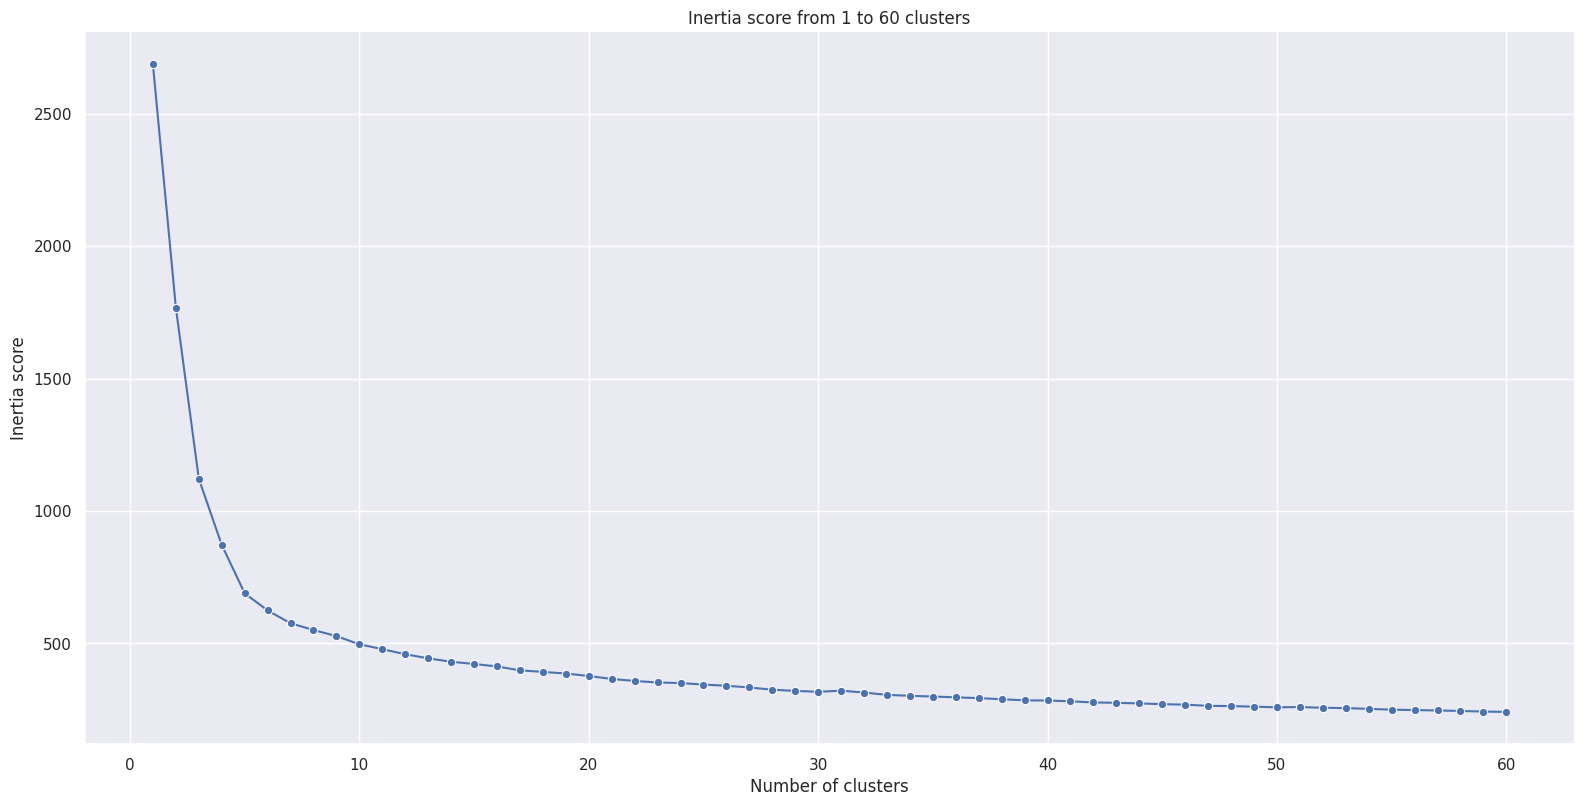

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [ ]:
# Decide on a random_state to use
seed = 27

# Set the maximum number of clusters to try
max_k = 40

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(15, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(Spotify5000)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

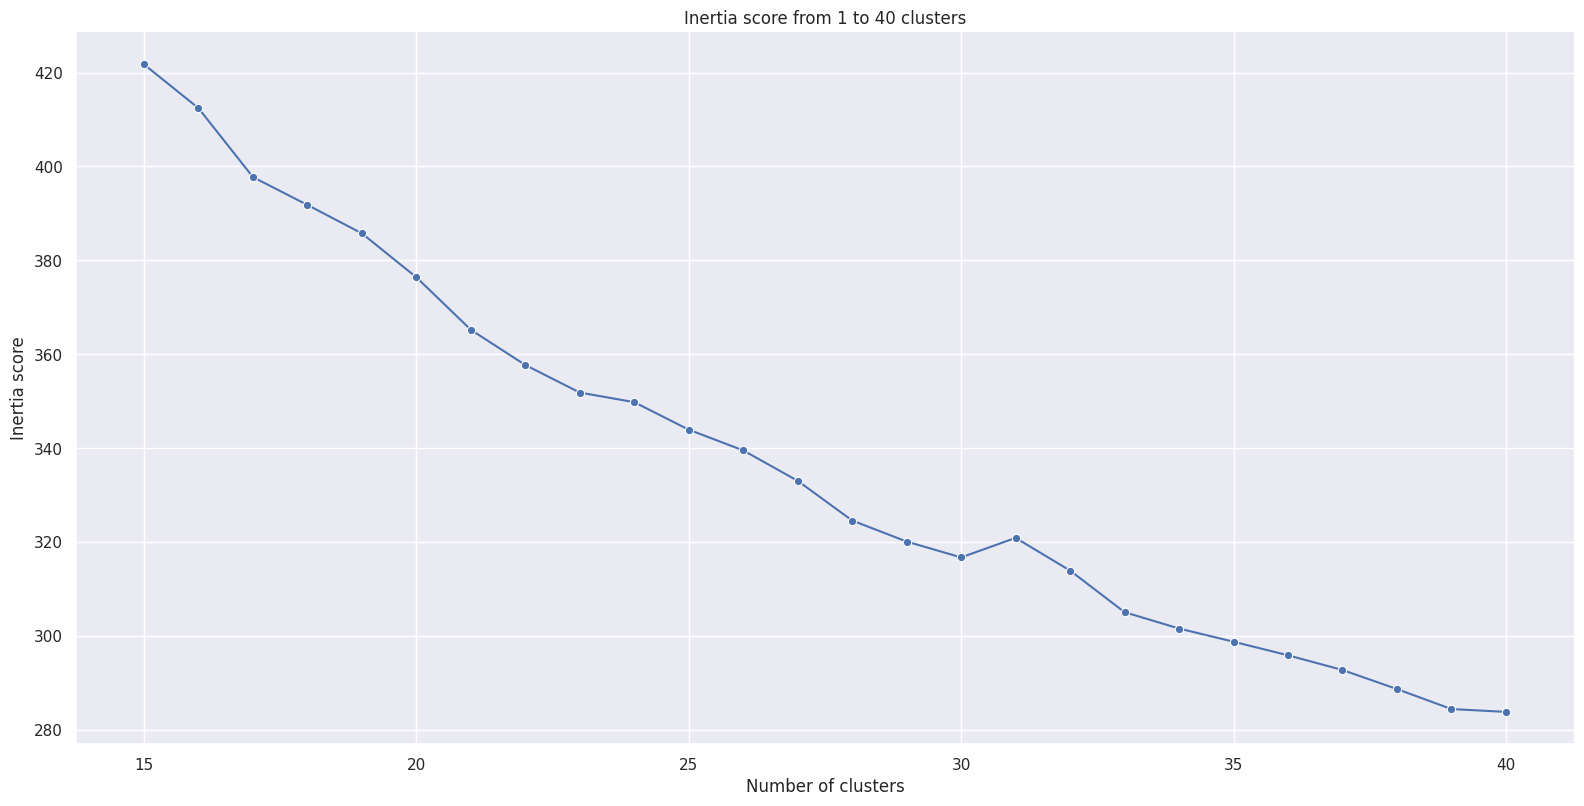

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(15, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

It seems that $k=20$, $k=21$, or $k=28$ could be good options. Using a different method, Tsiry showed that the best option would be $k=19$

## **Include here the method silhouete** since it is the one that determines the desicion.

## 4.&nbsp; Creat the list for $k=19$


In [ ]:
Spotify5000_k19 = Spotilist5000(19)

In [ ]:
List_aux2 = Spotify5000_k19.copy()

In [ ]:
List_aux2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 7Irp5B9hUwbLQ1bSOJhxoa  to 1wL2dk42Cxu4zCJs4SvFsZ 
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5171 non-null   float64
 1   energy            5171 non-null   float64
 2   loudness          5171 non-null   float64
 3   speechiness       5171 non-null   float64
 4   acousticness      5171 non-null   float64
 5   instrumentalness  5171 non-null   float64
 6   valence           5171 non-null   float64
 7   tempo             5171 non-null   float64
 8   play_list         5171 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 383.8+ KB


In [ ]:
Spotify5000i_links.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 1n7JnwviZ7zf0LR1tcGFq7  to 7E1ErYYCn0lYjHODZ1qGuB 
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5171 non-null   object
 1   html    5171 non-null   object
dtypes: object(2)
memory usage: 250.2+ KB


We have to merge the two data frames on a common column with unique entries. We tried using 'name' but it does not have unique values, so the resulting list had names that did not fit the rest of the columns. Because of this, we use the 'id' column. In this case, both data sets have 'id' as indexes, so we just use that.

In [ ]:
PlayList_k19_m = pd.merge(List_aux2, Spotify5000i_links, left_index=True, right_index=True)

In [ ]:
PlayList_k19_m

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,play_list,name,artist,html
id,,,,,,,,,,,,
7Irp5B9hUwbLQ1bSOJhxoa,0.868666,0.642,0.835186,0.279956,0.019177,0.000000,0.329949,0.444217,0,Faded,Tyga,https://open.spotify.com/track/7Irp5B9hUwbLQ1b...
6Tsu3OsuMz4KEGKbOYd6A0,0.925543,0.694,0.906654,0.299564,0.176707,0.000000,0.641624,0.439011,0,Hypnotize - 2007 Remaster,The Notorious B.I.G.,https://open.spotify.com/track/6Tsu3OsuMz4KEGK...
3qnoOm4fwZPBS116f5hpgF,0.956567,0.308,0.871149,0.368192,0.125502,0.000000,0.269036,0.570583,0,All Mine,Kanye West,https://open.spotify.com/track/3qnoOm4fwZPBS11...
3NGT0Td7H4Is1qrlDQJxma,0.965874,0.735,0.869421,0.273420,0.031124,0.000009,0.779695,0.473704,0,Check Yo Self - Remix,Ice Cube,https://open.spotify.com/track/3NGT0Td7H4Is1qr...
5ltdcgEflWut0osW0ZzLhM,0.632885,0.659,0.864090,0.442266,0.013755,0.000000,0.398985,0.463279,0,Da Rockwilder,Method Man,https://open.spotify.com/track/5ltdcgEflWut0os...
...,...,...,...,...,...,...,...,...,...,...,...,...
7dt6x5M1jzdTEt8oCbisTK,0.703206,0.578,0.883506,0.043573,0.332329,0.000000,0.346193,0.677779,18,Better Now,Post Malone,https://open.spotify.com/track/7dt6x5M1jzdTEt8...
6P4HiCzp1kX9sy20lbjHVg,0.609100,0.555,0.852907,0.026253,0.253012,0.000005,0.222335,0.425763,18,Liebe ist alles,Rosenstolz,https://open.spotify.com/track/6P4HiCzp1kX9sy2...
1KSYzZYiyOTQL5LnicnaOC,0.779731,0.429,0.832611,0.238562,0.287149,0.000000,0.426396,0.314038,18,Schwarz Auf Weiß,Max Mutzke,https://open.spotify.com/track/1KSYzZYiyOTQL5L...


In [ ]:
PlayList_k19_vf = PlayList_k19_m.loc[:,['name','artist','play_list', 'html']]

In [ ]:
PlayList_k19_vf['play_list'].value_counts()

,count
play_list,
1,579
7,433
2,402
3,389
9,348
17,348
14,289
13,253
6,236


In [ ]:
# To download the list as a csv file
#from google.colab import files
#
#PlayList_k19_vf.to_csv('PlayList_k19_vf.csv', index=True)  # This contains tha clean table with the lists of 19 clusters
#files.download('PlayList_k19_vf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
##5.&nbsp; Visualization

Here, we compute the average of the values in the columns in each list, so we have grouped by play_list.

In [ ]:
Spotify5000_k19.groupby(by='play_list').mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
play_list,,,,,,,,
0,0.798629,0.644540,0.869438,0.324425,0.134112,0.003091,0.593720,0.525549
1,0.259219,0.905333,0.839788,0.114093,0.007698,0.877834,0.214034,0.567273
2,0.263253,0.098677,0.592621,0.047435,0.947794,0.885355,0.098613,0.452905
3,0.756592,0.831931,0.891886,0.084897,0.065979,0.012131,0.820957,0.534211
4,0.480263,0.536543,0.843982,0.059548,0.572089,0.019800,0.369669,0.597540
5,0.289948,0.904831,0.849811,0.115020,0.008077,0.519192,0.218561,0.559154
6,0.624213,0.296770,0.765542,0.061213,0.802434,0.043020,0.521285,0.520477
7,0.725426,0.767242,0.889823,0.078557,0.076582,0.011639,0.513185,0.531713
8,0.779620,0.768537,0.881643,0.112697,0.378539,0.006854,0.800609,0.482473


In [ ]:
Spotify5000_k19.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'tempo', 'play_list'],
      dtype='object')

##Trying the Radar diagram

In [ ]:
import plotly.graph_objects as go

In [ ]:
Spotify5000_k19.head(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,play_list
id,,,,,,,,,
7Irp5B9hUwbLQ1bSOJhxoa,0.868666,0.642,0.835186,0.279956,0.019177,0.0,0.329949,0.444217,0
6Tsu3OsuMz4KEGKbOYd6A0,0.925543,0.694,0.906654,0.299564,0.176707,0.0,0.641624,0.439011,0


In [ ]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

df_aux = Spotify5000_k19.drop('play_list', axis=1).copy()
# State the label for each arm of the chart
categories = df_aux.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(Spotify5000_k19['play_list'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = []
  for l in range(0,8): # we want to leave out the column "play_list"
    mean_aux = Spotify5000_k19.loc[Spotify5000_k19["play_list"] == cluster, Spotify5000_k19.columns[l]].mean()
    cluster_means.append(mean_aux)
                  # Bonus: see if you can turn this code for `cluster_means` into a list comprehension

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'List {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean features by cluster',
  height = 620,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

Exploring how to use the variances to plot

In [ ]:
total_variance_per_cluster = (
    Spotify5000_k19.groupby("play_list").var().sum(axis=1)
)

<ipython-input-47-ff6147ee76e3>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




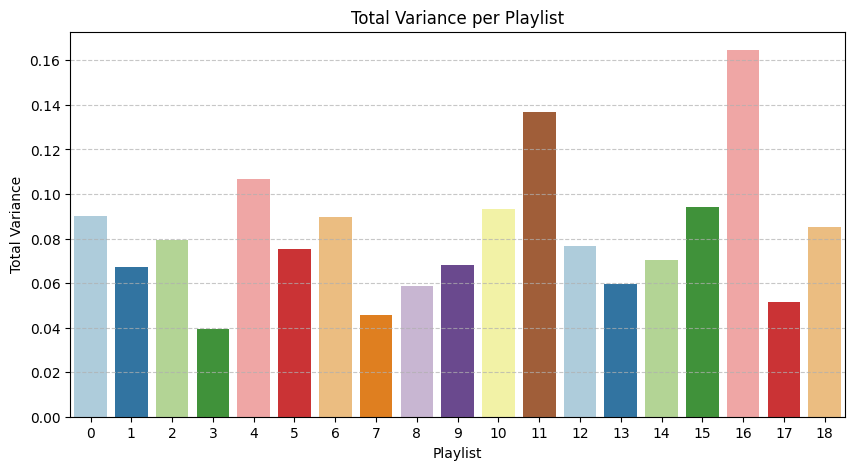

In [ ]:
import seaborn as sns

# Convert to DataFrame for Seaborn
variance_df = total_variance_per_cluster.reset_index()
variance_df.columns = ["Cluster", "Total Variance"]

# Create barplot
plt.figure(figsize=(10, 5))
sns.barplot(x="Cluster", y="Total Variance", data=variance_df, palette="Paired")

# Labels and title
plt.xlabel("Playlist")
plt.ylabel("Total Variance")
plt.title("Total Variance per Playlist")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Visualization of the clusters in 3D

I want to detect the three features with biggest variance and plot them in 3d

In [ ]:
column_variances = Spotify5000_k19.drop(columns=["play_list"]).var()

In [ ]:
column_variances.sort_values(ascending=False)

,0
instrumentalness,0.142519
acousticness,0.128375
energy,0.083789
valence,0.079614
danceability,0.050870
tempo,0.017847
loudness,0.010601
speechiness,0.006005


In [ ]:
top_3_columns = column_variances.nlargest(3).index.tolist()

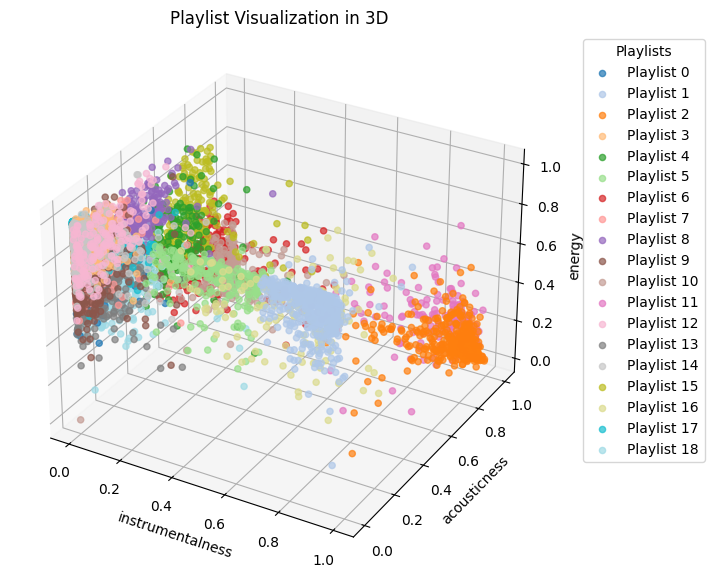

In [ ]:
import numpy as np
# Define a colormap
import matplotlib.colors as mcolors

# Generate a unique color for each cluster
unique_clusters = Spotify5000_k19["play_list"].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_clusters)))

# Create a mapping of cluster labels to colors
cluster_color_map = {cluster: color for cluster, color in zip(unique_clusters, colors)}

# Plot with manually assigned colors
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in unique_clusters:
    subset = Spotify5000_k19[Spotify5000_k19["play_list"] == cluster]
    ax.scatter(subset[top_3_columns[0]], subset[top_3_columns[1]], subset[top_3_columns[2]],
               color=cluster_color_map[cluster], label=f'Playlist {cluster}', alpha=0.7)

ax.set_xlabel(top_3_columns[0])
ax.set_ylabel(top_3_columns[1])
ax.set_zlabel(top_3_columns[2])
plt.title("Playlist Visualization in 3D")

# Add a legend
ax.legend(title="Playlists", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

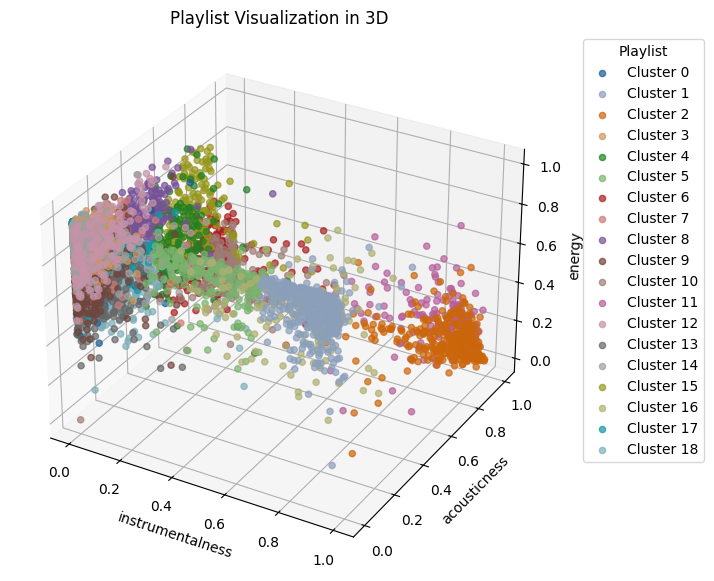

In [ ]:
import numpy as np
# Define a colormap
import matplotlib.colors as mcolors

# Generate a unique color for each cluster
unique_clusters = Spotify5000_k19["play_list"].unique()
base_colors = plt.cm.tab20(np.linspace(0, 1, len(unique_clusters)))
darker_colors = [(r*0.8, g*0.8, b*0.8) for r, g, b, _ in base_colors]  # Reduce brightness

# Create color mapping
cluster_color_map = {cluster: color for cluster, color in zip(unique_clusters, darker_colors)}


#colors = plt.cm.tab20(np.linspace(0, 1, len(unique_clusters)))
# Create a mapping of cluster labels to colors
#cluster_color_map = {cluster: color for cluster, color in zip(unique_clusters, colors)}

# Plot with manually assigned colors
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in unique_clusters:
    subset = Spotify5000_k19[Spotify5000_k19["play_list"] == cluster]
    ax.scatter(subset[top_3_columns[0]], subset[top_3_columns[1]], subset[top_3_columns[2]],
               color=cluster_color_map[cluster], label=f'Cluster {cluster}', alpha=0.7)

ax.set_xlabel(top_3_columns[0])
ax.set_ylabel(top_3_columns[1])
ax.set_zlabel(top_3_columns[2])
plt.title("Playlist Visualization in 3D")

# Add a legend
ax.legend(title="Playlist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The same plot but interactive


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Compute variance for all numerical columns (excluding "play_list")
column_variances = Spotify5000_k19.drop(columns=["play_list"]).var()

# Select the top 3 columns with the highest variance
top_3_columns = column_variances.nlargest(3).index.tolist()

# Extract the selected columns and labels
df_selected = Spotify5000_k19[top_3_columns].copy()
df_selected["play_list"] = Spotify5000_k19["play_list"]  # Add labels

# Create 3D scatter plot with PRISM colors & SMALL points
fig = px.scatter_3d(
    df_selected,
    x=top_3_columns[0],
    y=top_3_columns[1],
    z=top_3_columns[2],
    color="play_list",  # Color points by cluster
    opacity=0.8,  # Adjust transparency
    color_discrete_sequence=px.colors.qualitative.Dark2,  # Use PRISM color scheme
    size_max=7,  # Reduce max point size
    size=[3] * len(df_selected)  # Force all points to be tiny
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# Compute variance for all numerical columns (excluding "play_list")
column_variances = Spotify5000_k19.drop(columns=["play_list"]).var()

# Select the top 3 columns with the highest variance
top_3_columns = column_variances.nlargest(3).index.tolist()

# Extract the selected columns and labels
df_selected = Spotify5000_k19[top_3_columns].copy()
df_selected["play_list"] = Spotify5000_k19["play_list"]  # Add labels

# Create 3D scatter plot with PRISM colors & SMALL points
fig = px.scatter_3d(
    df_selected,
    x=top_3_columns[0],
    y=top_3_columns[1],
    z=top_3_columns[2],
    color="play_list",  # Color points by cluster
    opacity=0.8,  # Adjust transparency
    color_discrete_sequence=px.colors.qualitative.Bold,  # Use PRISM color scheme
    size_max=5,  # Reduce max point size
    size=[2] * len(df_selected)  # Force all points to be tiny
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# Compute variance for all numerical columns (excluding "play_list")
column_variances = Spotify5000_k20.drop(columns=["play_list"]).var()

# Select the 3 columns with the SMALLEST variance
bottom_3_columns = column_variances.nsmallest(3).index.tolist()

# Extract the selected columns and labels
df_selected = Spotify5000_k20[bottom_3_columns].copy()
df_selected["play_list"] = Spotify5000_k20["play_list"]  # Add labels

# Create 3D scatter plot with PRISM colors & SMALL points
fig = px.scatter_3d(
    df_selected,
    x=bottom_3_columns[0],
    y=bottom_3_columns[1],
    z=bottom_3_columns[2],
    color="play_list",  # Color points by cluster
    opacity=0.8,  # Adjust transparency
    color_discrete_sequence=px.colors.qualitative.Set1,  # Use PRISM color scheme
    size_max=5,  # Reduce max point size
    size=[2] * len(df_selected)  # Force all points to be tiny
)

# Show the plot
fig.show()

## Other ways to choose the variables

I wanted to check whether the variance is a good measure to choose the three variables to plot. We look at between clusters variance.

Selected features for 3D projection: ['instrumentalness', 'acousticness', 'energy']


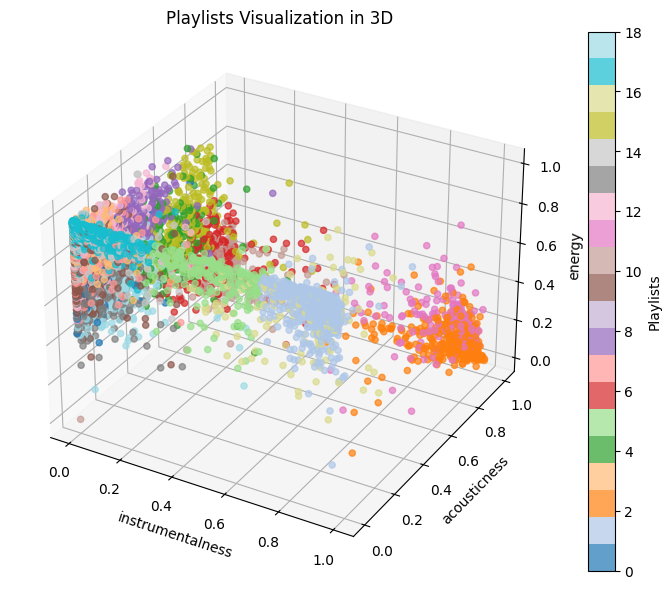

In [ ]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.cluster import KMeans

# Compute overall mean for each feature
global_means = Spotify5000_k19.drop(columns=['play_list']).mean()

# Compute cluster means for each feature
cluster_means = Spotify5000_k19.groupby('play_list').mean()

# Compute between-cluster variance
between_cluster_variance = cluster_means.apply(lambda col: np.sum(Spotify5000_k19['play_list'].value_counts() * (col - global_means[col.name])**2))

# Select top 3 features with highest between-cluster variance
top_3_features = between_cluster_variance.nlargest(3).index.tolist()
print("Selected features for 3D projection:", top_3_features)

# Plot the selected features in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Spotify5000_k19[top_3_features[0]], Spotify5000_k19[top_3_features[1]], Spotify5000_k19[top_3_features[2]], c=Spotify5000_k19['play_list'], cmap='tab20', alpha=0.7)
ax.set_xlabel(top_3_features[0])
ax.set_ylabel(top_3_features[1])
ax.set_zlabel(top_3_features[2])
plt.title("Playlists Visualization in 3D")
plt.colorbar(scatter, label='Playlists')
#ax.legend(title="Playlists", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Notice here that the criteria gives the same three variables, instrumentalness, acousticness and energy.